<a href="https://colab.research.google.com/github/prateekwalia31/Brain_Tumor_Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies and Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import zipfile
import random
import shutil

In [ ]:
import cv2
from tensorflow import keras
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator

# Data Preparation

In [ ]:
data_dir = '/content/drive/MyDrive/BMG5101/Brain Tumor/Brain_Tumor/'

train_dir = data_dir + 'Training' # Data directory path for the training data.

test_dir = data_dir + 'Testing' # Data directory path for the testing data.

val_dir = data_dir + 'Validation/' # Data directory path for the validation data.

In [ ]:
data_gen = ImageDataGenerator(rescale = 1.0/255)  # Using the ImageDataGenerator class from Keras to load the images in batches of 32.

train_data = data_gen.flow_from_directory(train_dir, class_mode='categorical', batch_size=32, target_size = (256,256), color_mode='grayscale') # Data generator object for loading training data in batches of 32 and a size of 256 x 256 as a grayscale image.

val_data = data_gen.flow_from_directory(val_dir, class_mode='categorical', batch_size=32, target_size = (256,256), color_mode='grayscale') # Data generator object for loading testing data in batches of 32.

test_data = data_gen.flow_from_directory(test_dir, class_mode='categorical', batch_size=32, target_size = (256,256), color_mode='grayscale', shuffle=False) # Data generator object for loading validation data in batches of 32.

Found 4571 images belonging to 4 classes.
Found 1148 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


#Data Visualization

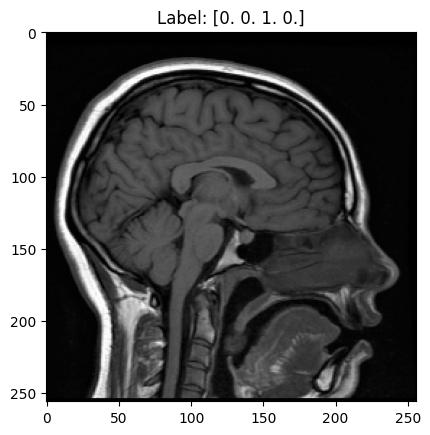

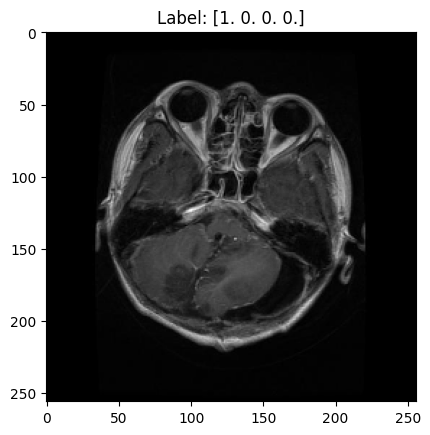

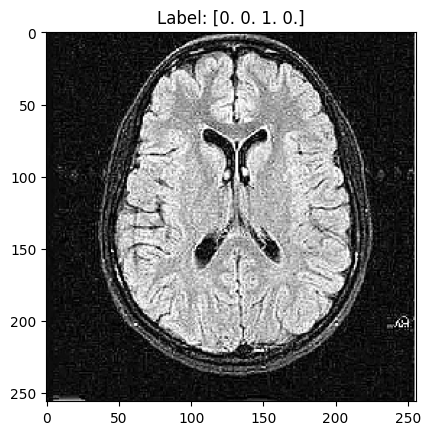

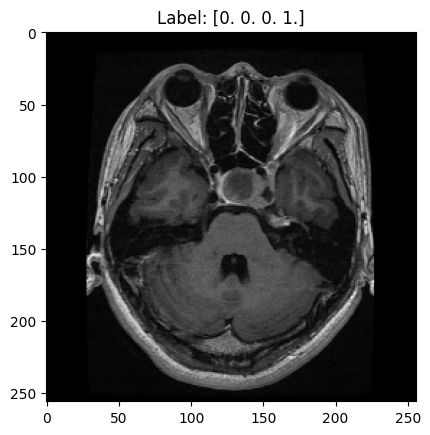

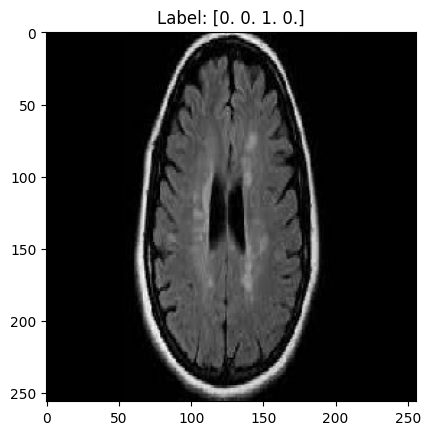

In [ ]:
#Plotting the images using Matplotlib

import matplotlib.pyplot as plt

images, labels = train_data[0]

for i in range(0, 5):
    if images.shape[-1] == 1:
        plt.imshow(images[i].reshape(images.shape[1], images.shape[2]), cmap='gray')
    else:
        plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.show()

#CNN Model Development

In [ ]:
# CNN Model Dependencies

from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Activation, Flatten, MaxPooling2D, Dense


In [ ]:
# CNN Model Design using TensorFlow Keras

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(1, 1), input_shape=(256, 256, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=1e-3)


model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 62, 62, 32)       

# CNN Model Training

In [ ]:
history = model.fit(train_data, epochs=20, validation_data = val_data)

Epoch 1/20
143/143 [==============================] - 982s 7s/step - loss: 0.9504 - accuracy: 0.6246 - val_loss: 0.8179 - val_accuracy: 0.6429
Epoch 2/20
143/143 [==============================] - 26s 183ms/step - loss: 0.4997 - accuracy: 0.8077 - val_loss: 0.5333 - val_accuracy: 0.8145
Epoch 3/20
143/143 [==============================] - 26s 184ms/step - loss: 0.3594 - accuracy: 0.8630 - val_loss: 0.4362 - val_accuracy: 0.8389
Epoch 4/20
143/143 [==============================] - 26s 184ms/step - loss: 0.2739 - accuracy: 0.8972 - val_loss: 0.3453 - val_accuracy: 0.8798
Epoch 5/20
143/143 [==============================] - 31s 219ms/step - loss: 0.1786 - accuracy: 0.9379 - val_loss: 0.3492 - val_accuracy: 0.8711
Epoch 6/20
143/143 [==============================] - 26s 182ms/step - loss: 0.1398 - accuracy: 0.9519 - val_loss: 0.3036 - val_accuracy: 0.8876
Epoch 7/20
143/143 [==============================] - 26s 181ms/step - loss: 0.0938 - accuracy: 0.9661 - val_loss: 0.2908 - val_accu

Text(0.5, 1.0, 'Accuracy Curve')

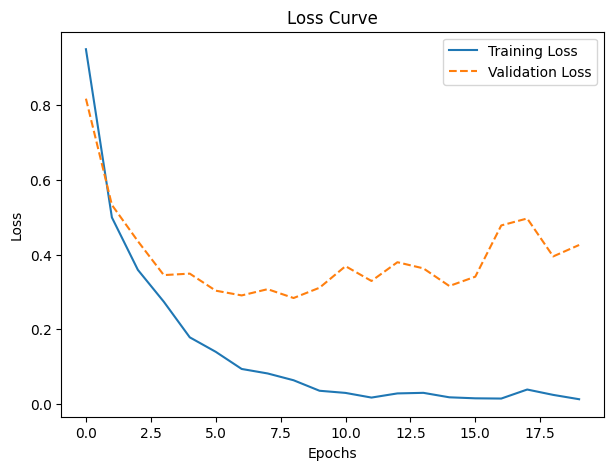

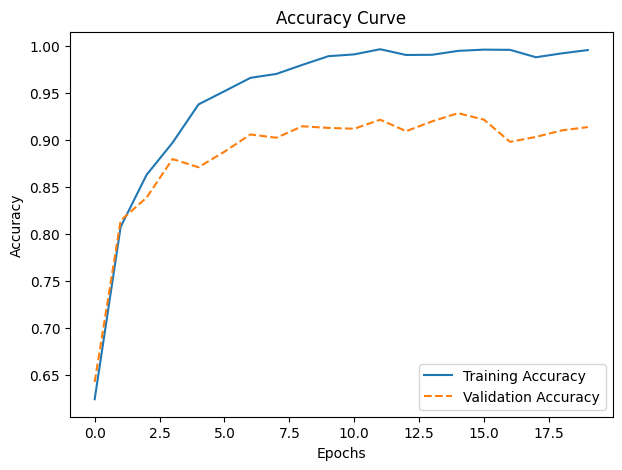

In [ ]:
# Loss History
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],ls='--')
plt.legend(['Training Loss','Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss Curve")

# Accuracy History
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],ls='--')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy Curve")


# Saving the trained CNN model architecture and weights

In [ ]:
!mkdir -p saved_models
model.save('saved_models/cnn_brain_tumor1')

In [ ]:
!zip -r '/content/brain_tumor_saved.zip' '/content/saved_models'

  adding: content/saved_models/ (stored 0%)
  adding: content/saved_models/cnn_brain_tumor1/ (stored 0%)
  adding: content/saved_models/cnn_brain_tumor1/assets/ (stored 0%)
  adding: content/saved_models/cnn_brain_tumor1/fingerprint.pb (stored 0%)
  adding: content/saved_models/cnn_brain_tumor1/saved_model.pb (deflated 89%)
  adding: content/saved_models/cnn_brain_tumor1/variables/ (stored 0%)
  adding: content/saved_models/cnn_brain_tumor1/variables/variables.data-00000-of-00001 (deflated 25%)
  adding: content/saved_models/cnn_brain_tumor1/variables/variables.index (deflated 63%)
  adding: content/saved_models/cnn_brain_tumor1/keras_metadata.pb (deflated 90%)


# CNN Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

test_labels = test_data.labels

label_map = {0: 'Glioma', 1: 'Meningioma', 2: 'No Tumor', 3: 'Pituitary'}

test_labels_str = [label_map[label] for label in test_labels]

test_predictions = model.predict(test_data)
test_predictions = np.argmax(test_predictions, axis=1)

# Converting the test predictions to their corresponding labels

test_predictions_str = [label_map[label] for label in test_predictions]

report = classification_report(test_labels_str, test_predictions_str)

print(report)

41/41 [==============================] - 369s 9s/step
              precision    recall  f1-score   support

      Glioma       0.91      0.90      0.90       300
  Meningioma       0.88      0.80      0.84       306
    No Tumor       0.94      0.99      0.97       405
   Pituitary       0.96      0.99      0.98       300

    accuracy                           0.93      1311
   macro avg       0.92      0.92      0.92      1311
weighted avg       0.92      0.93      0.92      1311



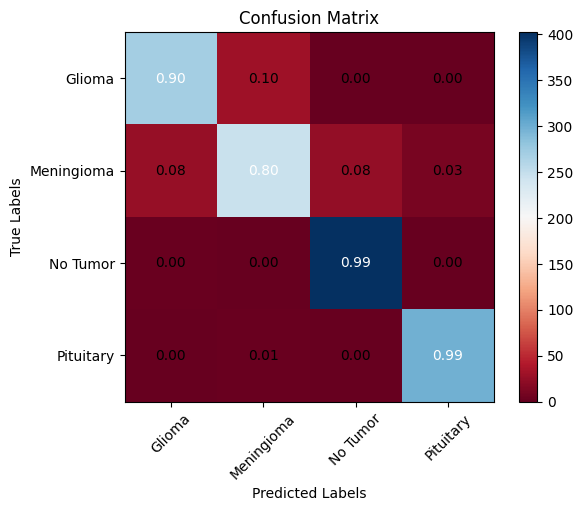

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels_str, test_predictions_str)

plt.imshow(cm, cmap=plt.cm.RdBu)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Normalizing the confusion matrix so that each row adds up to 1
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Setting the text color for each cell based on its value
thresh = cm.max() / 2
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm_norm[i, j], '.2f'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)